In [36]:
#2 - Getting Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [37]:
#3  - Cleaning/Wrangling/EDA
df = df.drop(['Education'], axis = 1)
df = df.drop(['Number of Open Complaints'], axis = 1)

clt = df['Customer Lifetime Value']


for i in clt:
    i = i * 100
    pd.to_numeric(clt, errors='coerce')

    
df['Customer Lifetime Value'] = clt

def lowercase_cols(df):
    
    df1 = df.copy()
    cols = df1.columns
    column =[]
    
    for col in cols:
        new_col = ""
        for letter in col:
            if letter == " ":
                letter = "_"
                new_col += letter
            else:
                new_col += letter
        
        column.append(new_col.lower())
    
    df1.columns = column
    
    return df1    


    
def nan_values(df, threshold = 25):
    
    df1 = df.copy()
    
    columns = df1.columns
    rows = df.shape[0]
    
    for column in columns:
        na = df1[column].isna().sum()
        if na > (threshold * rows / 100):
            df1 = df1.drop([column], axis = 1)
        else: 
            df1 = df1[df1[column].isna() == False]
    
    return df1



    

   


In [38]:
df1 = df.copy()
col = df.columns
cat = []
num = []
for i in col:
    if df.dtypes[i] == 'object':
        cat.append(df[i])
    elif df.dtypes[i] == 'float64' or 'int64':
        num.append(df[i])
            
cat = pd.DataFrame(cat).T
num = pd.DataFrame(num).T


In [39]:

df1 = lowercase_cols(df)
df1 = nan_values(df1)

df1.describe()
df1


,customer,state,customer_lifetime_value,response,coverage,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,2/24/11,Employed,F,56274,Suburban,...,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,1/31/11,Unemployed,F,0,Suburban,...,13,42,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,2/19/11,Employed,F,48767,Suburban,...,18,38,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,1/20/11,Unemployed,M,0,Suburban,...,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,2/3/11,Employed,M,43836,Rural,...,12,44,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,2/10/11,Employed,M,71941,Urban,...,18,89,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,2/12/11,Employed,F,21604,Suburban,...,14,28,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,2/6/11,Unemployed,M,0,Suburban,...,9,37,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,2/3/11,Employed,M,21941,Suburban,...,34,3,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<AxesSubplot:>

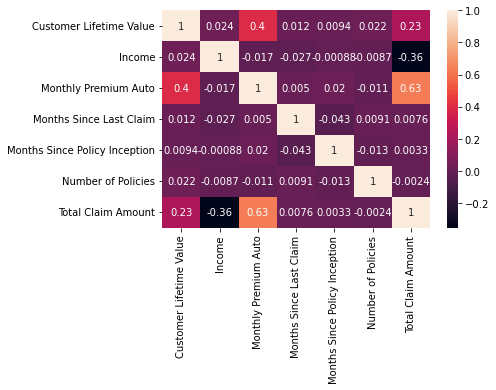

In [40]:
#Exploring Data


num_1 = num.copy()
sns.heatmap(num_1.corr(), annot=True)

(array([[9134.],
        [9134.]]),
 array([    0., 99981.]),
 <a list of 2 BarContainer objects>)

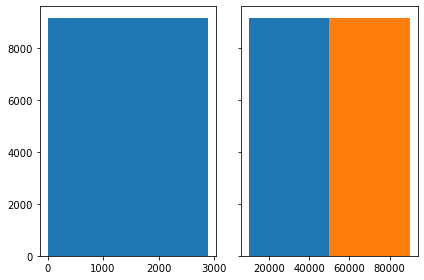

In [41]:
y = pd.DataFrame(df1["total_claim_amount"])
X_1 = df1[["income","monthly_premium_auto"]].copy()


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


axs[0].hist(y, bins=1)
axs[1].hist(X_1, bins=1)

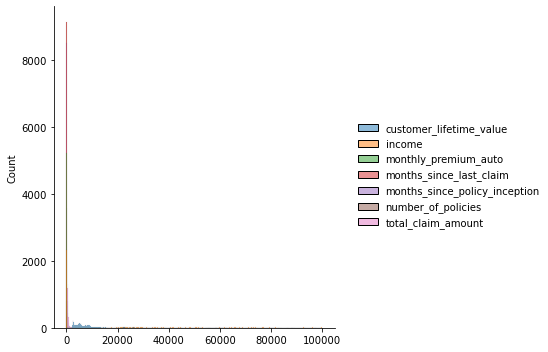

In [13]:
#4 - Processing Data

from scipy import stats



In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(num)
num_normal = transformer.transform(num)
print(num_normal.shape)
num_normal
num_norm = pd.DataFrame(num_normal, columns=num.columns)

(9134, 7)


In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

cate_go = []
for i in cat:
    cate_go.append(encoder.fit_transform(cat[i]))
    
cat_encode = pd.DataFrame(cate_go)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=22)


In [47]:
lm_1 = linear_model.LinearRegression()
lm_1.fit(X_train,y_train)

y_pred_train = lm_1.predict(X_train)
y_pred_test = lm_1.predict(X_test)

R2_train_1 = r2_score(y_train, y_pred_train)
R2_test_1 = r2_score(y_test, y_pred_test)

print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.5174409179324414
MSE for training is: 40628.718019301334
RMSE for training is: 201.56566676718865
MAE for training is: 144.70232443203906
MAPE for training is: 2.154753973288986
------------------------
R2 score por testing is: 0.5202157316628304
MSE for testing is: 40690.295249474904
RMSE for testing is: 201.71835625315538
MAE for testing is: 143.6791746166944
MAPE for testing is: 2.235927212947441
